In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('./mushroom.csv')
data_encoded = pd.get_dummies(data)

In [3]:
# Standardize the data to have a mean of 0 and a standard deviation of 1
# This insures that the model is not biased towards features with larger scales
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_encoded)

siluette_scores = []
wcss = []

# Calculate the silhouette score for different values of k
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k) # Create a KMeans instance with k clusters
    kmeans.fit(x_scaled)

    # calculate the silhouette score which is a measure of how similar an object is to its own cluster compared to other clusters (from -1 to 1)
    silhouette_avg =silhouette_score(x_scaled, kmeans.labels_)
    siluette_scores.append(silhouette_avg)
    
    # calculate the within-cluster sum of squares (WCSS) which is the sum of the squared distances between each member of the cluster and its centroid (how thight the clusters are)
    wcss.append(kmeans.inertia_)

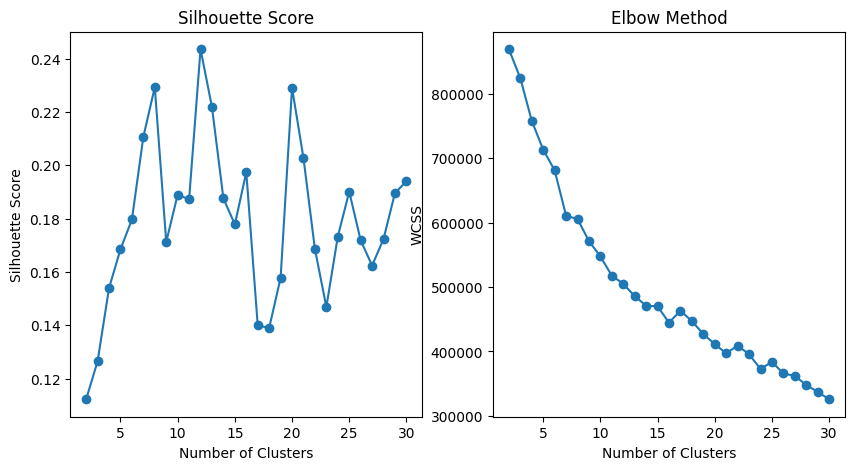

In [4]:
# Plot the silhouette score and the within-cluster sum of squares (WCSS) for different values of k to
# determine the optimal number of clusters. The optimal number of clusters is the one that maximizes the silhouette score and minimizes the WCSS
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 31), siluette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot the within-cluster sum of squares (WCSS) with the elbow method
# The optimal number of clusters is the one that is at the "elbow" of the curve
plt.subplot(1, 2, 2)
plt.plot(range(2, 31), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [5]:
# Find optimal k based on silhouette score (the maximum silhouette score)
optimal_k_silhouette = np.argmax(siluette_scores) + 2  # Add 2 because k starts from 2
print(f"Optimal k based on silhouette score: {optimal_k_silhouette}")

# Find optimal k based on the elbow method (biggest drop in WCSS)
wcss_diffs = np.diff(wcss)  # Calculate the difference between successive WCSS values
optimal_k_elbow = np.argmin(np.abs(wcss_diffs)) + 2  # Add 2 because k starts from 2
print(f"Optimal k based on elbow method: {optimal_k_elbow}")

Optimal k based on silhouette score: 12
Optimal k based on elbow method: 14


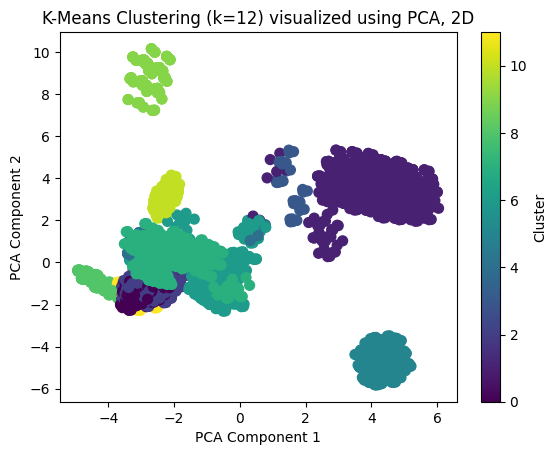

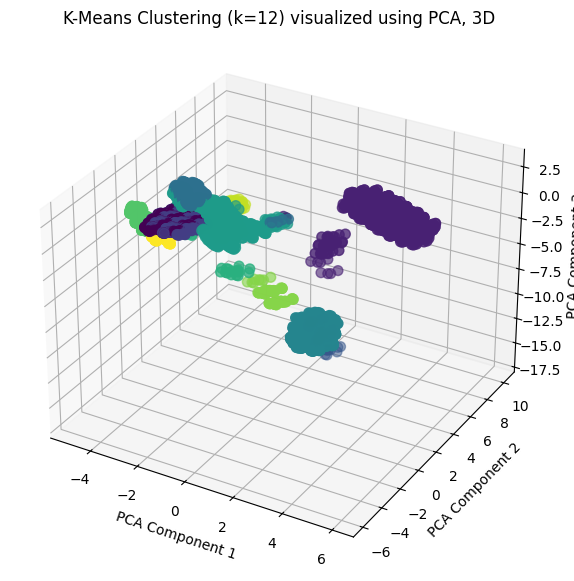

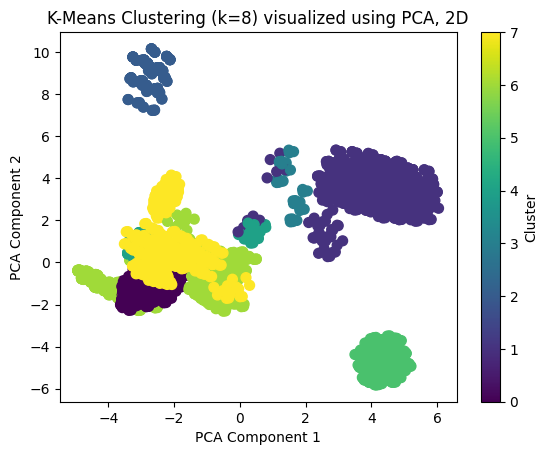

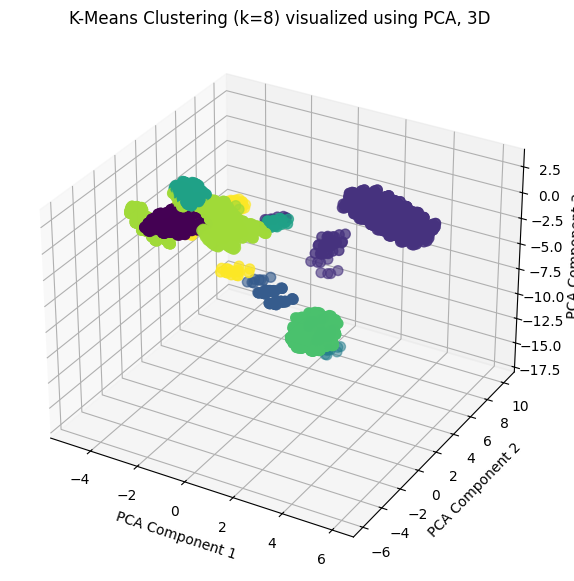

In [7]:
# Apply PCA to reduce the dimensionality of the data to 2 and 3 dimensions, helps simplify the data and make it easier to visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Optimal K = 12
optimal_k = 12
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(x_scaled)

# Visualize the clusters in 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={optimal_k}) visualized using PCA, 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize the clusters in 3D space
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_optimal, cmap='viridis', s=50)
ax.set_title(f'K-Means Clustering (k={optimal_k}) visualized using PCA, 3D')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# Optimal K = 15
optimal_k = 8
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(x_scaled)

# Visualize the clusters in 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={optimal_k}) visualized using PCA, 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize the clusters in 3D space
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_optimal, cmap='viridis', s=50)
ax.set_title(f'K-Means Clustering (k={optimal_k}) visualized using PCA, 3D')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()
